# Training the mapping for Bayesian optimization using regression 

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [108]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

In [109]:
from os import path

In [110]:
import sys
sys.path.append("../..")
from DexterousManipulation.training.custom_data_loader import load_filtered_class_data

Note: Better to train one mapping *per class* ! 

In [111]:
def load_mapping_data_set(class_0_folder, one_hot, nb_total_samples, rand_seed, test_train_ratio, batch_size, verbose):
    nb_samp_class = int(nb_total_samples/2)
    # Loading filtered raw data 
    if verbose >= 1:
        print("Loading class 0.")
    class_0_dist, class_0_hands, time_taken = load_filtered_class_data(folder_name = class_0_folder, nb_samples = nb_samp_class)
    if verbose >= 1: 
        print("Time taken to load class 0: ", time_taken)

   
    # Fusing the informations 
    inputs = [] 
    outputs = [] 
    # Class 0 
    for index in range(len(class_0_dist)): 
        tmp_list = []
        for hand_index in range(len(class_0_hands[-1])): 
            tmp_list.append(np.float64(class_0_hands[index][hand_index]))
        inputs.append(tmp_list)
        outputs.append(np.float64(class_0_dist[index]))
        
    # Shuffling the data 
    X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=test_train_ratio, random_state=rand_seed)

    # Creating the Tensors 
    input_tensor_training = tf.constant(X_train)
    output_tensor_training = tf.constant(y_train)
    input_tensor_test = tf.constant(X_test)
    output_tensor_test = tf.constant(y_test)
        
    return input_tensor_training, output_tensor_training, input_tensor_test, output_tensor_test


In [114]:
# Hyper-parameters 
nb_epochs = 100
folder_class_0 = "DATA_SET_BIG_CUBE"
folder_class_1 = "DATA_SET_MEDIUM_CUBE"
batch_size = 50
input_size = 13
test_train_ratio = 0.2
training_run_nb = 1
shuffling_seed = 42
apply_one_hot_encoding = True 
nb_total_samples = 500000
verbose = 1 

folder_saving_str = "/../Figures/Training/500k_Data_Set/Medium_Cube_Mapping"
# basepath = path.dirname(__file__)
# folder_saving_str = path.abspath(path.join(basepath, "..", "Figures/Training/500k_Data_Set/Big_Cube_Mapping"))

In [115]:
input_tensor_training, output_tensor_training, input_tensor_test, output_tensor_test = load_mapping_data_set(class_0_folder = folder_class_1, 
                             one_hot = apply_one_hot_encoding, 
                             nb_total_samples = nb_total_samples, 
                             rand_seed = shuffling_seed, 
                             test_train_ratio = test_train_ratio, 
                             batch_size = batch_size, 
                             verbose = verbose)

Loading class 0.
Time taken to load class 0:  4.773678779602051


In [116]:
# Creating the data set 
# dataset_training = tf.data.Dataset.from_tensor_slices((input_tensor_training, output_tensor_training))
#dataset_testing = tf.data.Dataset.from_tensor_slices((input_tensor_test, output_tensor_test))

In [117]:
model_mapping = keras.Sequential(
        [
            keras.layers.InputLayer(input_shape=(input_size,)), 
            layers.Dense(64, activation='relu'), 
            layers.Dense(32, activation='relu'), 
            layers.Dense(1)
        ]
    )

In [118]:
model_mapping.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [119]:
%%time
history = model_mapping.fit(
    input_tensor_training, output_tensor_training,
    validation_split=0.2,
    verbose=verbose, epochs=nb_epochs)

Epoch 1/100
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0091 - val_loss: 0.0077
Epoch 2/100
5000/5000 [==============================] - 5s 1ms/step - loss: 0.0078 - val_loss: 0.0070
Epoch 3/100
5000/5000 [==============================] - 5s 1ms/step - loss: 0.0066 - val_loss: 0.0057
Epoch 4/100
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 5/100
5000/5000 [==============================] - 5s 1ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 6/100
5000/5000 [==============================] - 5s 1ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 7/100
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 8/100
5000/5000 [==============================] - 5s 987us/step - loss: 0.0047 - val_loss: 0.0045
Epoch 9/100
5000/5000 [==============================] - 5s 1ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 10/100
5000/5000 [==============================] - 5s 1ms/step -

5000/5000 [==============================] - 5s 1ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 80/100
5000/5000 [==============================] - 5s 1ms/step - loss: 0.0030 - val_loss: 0.0036
Epoch 81/100
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 82/100
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 83/100
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 84/100
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 85/100
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 86/100
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 87/100
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 88/100
5000/5000 [==============================] - 7s 1ms/step - loss:

In [120]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.01])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

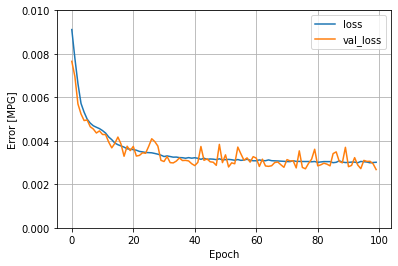

In [121]:
plot_loss(history)

In [122]:
test_results = model_mapping.evaluate(input_tensor_test, output_tensor_test, verbose=verbose)

1563/1563 [==============================] - 2s 1ms/step - loss: 0.0027


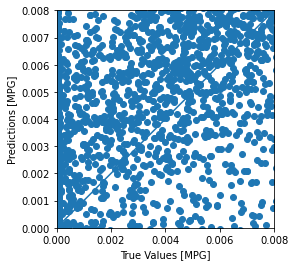

In [123]:
test_predictions = model_mapping.predict(input_tensor_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(output_tensor_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 0.008]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

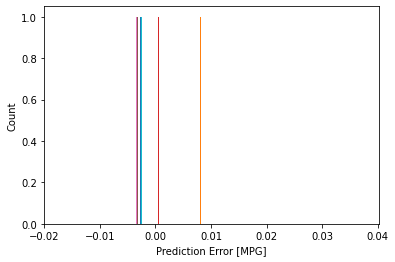

In [64]:
# Look at error 
error = test_predictions - output_tensor_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [124]:
model_mapping.save("Test_Model_Mapping_Medium_100_500K")

INFO:tensorflow:Assets written to: Test_Model_Mapping_Medium_100_500K\assets


In [125]:
np.set_printoptions(precision=4)

In [126]:
print(output_tensor_training[:5])

tf.Tensor([2.0059e-05 5.6805e-03 2.9686e-02 2.6959e-02 2.7397e-02], shape=(5,), dtype=float64)


In [127]:
print(test_predictions[:2])

[0.0133 0.0271]


In [128]:
print(output_tensor_test[:2])

tf.Tensor([0.0166 0.0252], shape=(2,), dtype=float64)
